# Plot error threshold

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import factorial

# Function to calculate logical error rate P_L
def logical_error_rate(d, P_e):
    d_e = (d + 1) // 2
    comb = factorial(d) / (factorial(d_e - 1) * factorial(d_e))
    P_L = d * comb * (P_e ** d_e)
    return P_L

# Code distances to consider
code_distances = [3,  7,  11, 15, 19, 23, 27, 30]

# Physical error rates to consider
P_e_values = np.linspace(0.0001, 0.5, 100)

# Physical error rates to consider
P_e_values = np.logspace(-8, 1, 100)  # Logarithmic scale from 0.001 to 0.1

# Plotting the results
plt.figure(figsize=(10, 6))

for d in code_distances:
    P_L_values = [logical_error_rate(d, P_e) for P_e in P_e_values]
    plt.plot(P_e_values, P_L_values, label=f'd = {d}')

plt.xscale('log')
plt.yscale('log')  # Logical error rate is typically plotted on a logarithmic scale
plt.xlabel(r'Physical Error Rate ($P_e$)')
plt.ylabel(r'Logical Error Rate ($P_L$)')
plt.title('Logical Error Rate vs. Physical Error Rate for Different Code Distances (Log-Log Scale)')
plt.legend()
plt.grid(True)
plt.savefig("SurfaceEstimate.png")
plt.show()


# Plot binomial distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 5000
p = 0.01

# Binomial distribution
k = np.arange(0, n+1)
probabilities = binom.pmf(k, n, p)

plt.figure(figsize=(10, 6))
plt.stem(k, probabilities)
plt.xlim(0,2*n*p)
plt.xlabel('Number of Errors')
plt.ylabel('Probability')
plt.title('Binomial Distribution of the number of error (n=50, p=0.01)')
plt.grid(True)
plt.savefig("Binomial")
plt.show()

# Histogram of 2 qubit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fixed probability value
p = 0.85

# Calculate probabilities for the first set of equations
P1_0 = (1-p)**4 + p**2 * (1-p)**2 + 2 * p**3 * (1-p)
P1_1 = 3*p * (1-p)**3 + 3*p**2 * (1-p)**2 + p**3 * (1-p) + p**4
P1_2 = p * (1-p)**3 + 2 * p**2 * (1-p)**2 + p**3 * (1-p)

# Calculate probabilities for the second set of equations
P2_0 = (2*p**2 - 2*p + 1)**2
P2_1 = 2 * (2*p - 2*p**2) * (2*p**2 - 2*p + 1)
P2_2 = (2*p - 2*p**2)**2

# Data for histograms
values = np.array([0, 1, 2])
P1_values = [P1_0, P1_1, P1_2]
P2_values = [P2_0, P2_1, P2_2]

# Bar width
bar_width = 0.25

# Plot the histograms
plt.figure(figsize=(10, 6))

# Histogram for the first set of probabilities
plt.bar(values - bar_width/2, P1_values, bar_width, label='After CNOT propagation', color='blue', edgecolor='black')

# Histogram for the second set of probabilities
plt.bar(values + bar_width/2, P2_values, bar_width, label='Before CNOT propagation', color='red', edgecolor='black')

plt.xlabel('Number of Bitflip errors at T=2',fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.title('Histogram of Two Probability Distributions for p=0.85',fontsize=16)
plt.xticks(values)
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig("2QubitDistribution.png")
plt.show()


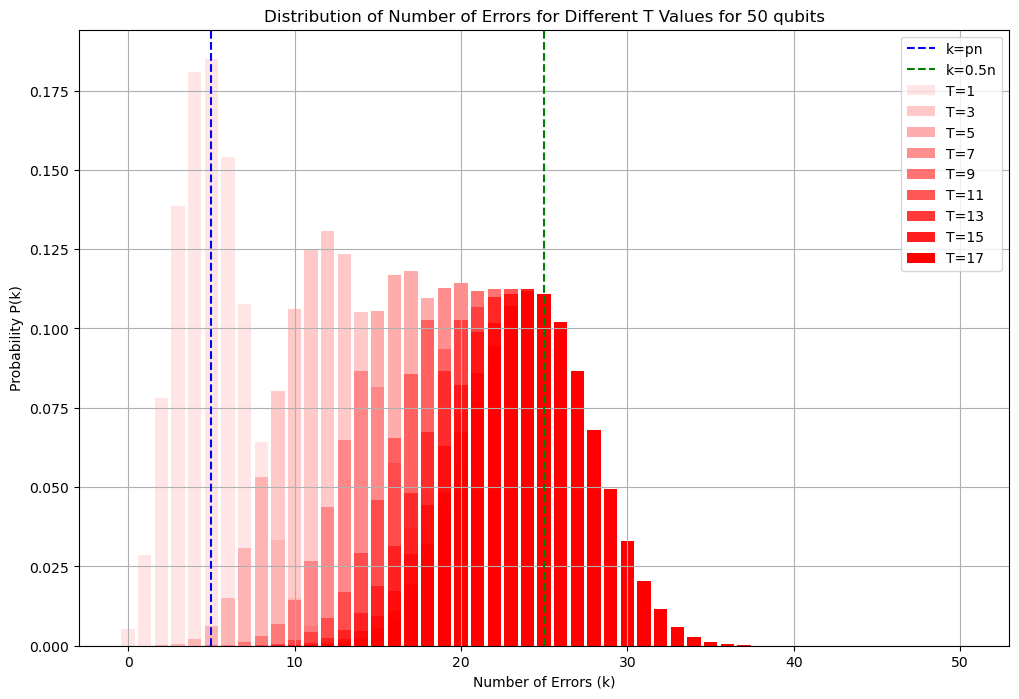

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

# Define the parameters
n = 50
T_values = [1, 3, 5, 7, 9, 11,13,15,17]
p = 0.1  # Assuming a bit-flip probability

# Function to calculate P(even) and P(odd)
def P_even_odd(T, p):
    P_even = sum(binom(T, 2*k) * p**(2*k) * (1-p)**(T-2*k) for k in range(T//2 + 1))
    P_odd = sum(binom(T, 2*k+1) * p**(2*k+1) * (1-p)**(T-2*k-1) for k in range((T+1)//2))
    return P_even, P_odd

# Function to calculate the distribution P(k)
def P_k(n, T, p):
    P_even, P_odd = P_even_odd(T, p)
    P_k_values = [binom(n, k) * (P_even**(n-k)) * (P_odd**k) for k in range(n+1)]
    return P_k_values

# Plotting the histograms
plt.figure(figsize=(12, 8))

# Define the base color and opacity increment
base_color = 'red'
opacities = np.linspace(0.1, 1.0, len(T_values))

for T, opacity in zip(T_values, opacities):
    P_k_values = P_k(n, T, p)
    plt.bar(range(n+1), P_k_values, alpha=opacity, color=base_color, label=f'T={T}')
# Plot the horizontal dashed line at x = p * n
plt.axvline(x=p*n, color='blue', linestyle='--', label="k=pn")
plt.axvline(x=0.5*n, color='green', linestyle='--', label="k=0.5n")


plt.xlabel('Number of Errors (k)')
plt.ylabel('Probability P(k)')
plt.title('Distribution of Number of Errors for Different T Values for 50 qubits')
plt.legend()
plt.grid(True)
plt.savefig("50QubitNoCNOT.png")
plt.show()
